## Stocks Performance Analysys

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
spx_f = ['SPX_1.csv', 'SPX_2.csv']
spx_df = pd.concat([pd.read_csv(spx, parse_dates=['Date']) for spx in spx_f], ignore_index=True).sort_values(by='Date')
spx_df['Date'] = pd.to_datetime(spx_df['Date'], utc=True)
spx_df = spx_df.set_index('Date')
spx_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-12-01 05:00:00+00:00,4087.139893,4100.509766,4050.870117,4076.570068,4527130000,0.0,0.0
2022-12-02 05:00:00+00:00,4040.169922,4080.479980,4026.629883,4071.699951,4012620000,0.0,0.0
2022-12-05 05:00:00+00:00,4052.020020,4052.449951,3984.489990,3998.840088,4280820000,0.0,0.0
2022-12-06 05:00:00+00:00,3996.629883,4001.510010,3918.389893,3941.260010,4368380000,0.0,0.0
2022-12-07 05:00:00+00:00,3933.280029,3957.570068,3922.679932,3933.919922,4118050000,0.0,0.0


In [5]:
all_fund_files = ['AAPL_1.csv', 'AAPL_2.csv', 'AMZN_1.csv', 'AMZN_2.csv', 'GOOGL_1.csv', 'GOOGL_2.csv',
                  'META_1.csv', 'META_2.csv', 'NFLX_1.csv', 'NFLX_2.csv', 'TSLA_1.csv', 'TSLA_2.csv']

all_fund = pd.concat([pd.read_csv(fund, parse_dates=['Date'])
                      .assign(Symbol=fund.split('_')[0]) for fund in all_fund_files], 
                     ignore_index=True).sort_values(by='Date')

all_fund['Date'] = pd.to_datetime(all_fund['Date'], utc=True)
all_fund = all_fund.set_index('Date')
all_fund.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol
Date,,,,,,,,
2022-12-01 05:00:00+00:00,147.580366,148.496455,145.987157,147.679932,71250400,0.0,0.0,AAPL
2022-12-01 05:00:00+00:00,101.019997,102.250000,100.250000,100.989998,28687100,0.0,0.0,GOOGL
2022-12-01 05:00:00+00:00,303.989990,319.799988,303.029999,316.950012,14664900,0.0,0.0,NFLX
2022-12-01 05:00:00+00:00,96.989998,97.230003,94.919998,95.500000,68488000,0.0,0.0,AMZN
2022-12-01 05:00:00+00:00,119.199997,121.199997,118.400002,120.440002,36551400,0.0,0.0,META


In [6]:
# Resampling dataframes to quarterly frequency
all_fund_qtr = all_fund.groupby('Symbol')['Close'].resample('Q').last().pct_change() * 100
spx_df_qtr = spx_df['Close'].resample('Q').last().pct_change() * 100
print(spx_df_qtr)
all_fund_qtr.head(10)

Date
2022-12-31 00:00:00+00:00         NaN
2023-03-31 00:00:00+00:00    7.027219
2023-06-30 00:00:00+00:00    8.299929
2023-09-30 00:00:00+00:00   -3.647556
2023-12-31 00:00:00+00:00   -3.517213
Freq: Q-DEC, Name: Close, dtype: float64


Symbol  Date                     
AAPL    2022-12-31 00:00:00+00:00          NaN
        2023-03-31 00:00:00+00:00    27.108273
        2023-06-30 00:00:00+00:00    17.791574
        2023-09-30 00:00:00+00:00   -11.614577
        2023-12-31 00:00:00+00:00    -2.523221
AMZN    2022-12-31 00:00:00+00:00   -49.667445
        2023-03-31 00:00:00+00:00    22.964287
        2023-06-30 00:00:00+00:00    26.207764
        2023-09-30 00:00:00+00:00    -2.485423
        2023-12-31 00:00:00+00:00    -5.939272
Name: Close, dtype: float64

In [7]:
# Calculating the weighted average return for the fund
weights = {'META': 0.15, 'NFLX': 0.10, 'AAPL': 0.25, 'TSLA': 0.15, 'GOOGL': 0.20, 'AMZN': 0.15}
fund_qtr = all_fund_qtr.unstack('Symbol')
fund_return = (fund_qtr * pd.Series(weights)).sum(axis=1)
fund_return

Date
2022-12-31 00:00:00+00:00   -23.125023
2023-03-31 00:00:00+00:00    37.131889
2023-06-30 00:00:00+00:00    23.446008
2023-09-30 00:00:00+00:00    -2.809853
2023-12-31 00:00:00+00:00    -5.403891
Freq: Q-DEC, dtype: float64

In [8]:
# Calculate the difference between the fund's return and the SPX500's return
diff = fund_return - spx_df_qtr
diff

Date
2022-12-31 00:00:00+00:00          NaN
2023-03-31 00:00:00+00:00    30.104671
2023-06-30 00:00:00+00:00    15.146079
2023-09-30 00:00:00+00:00     0.837703
2023-12-31 00:00:00+00:00    -1.886678
Freq: Q-DEC, dtype: float64

In [9]:
# Creating the report table
report = pd.DataFrame({
    'Fund Gain/Loss %': fund_return.round(2),
    'SPX Gain/Loss %': spx_df_qtr.round(2),
    'Fund vs SPX%': diff.round(2)
})
# Convert index to timezone-naive format
report.index = report.index.tz_localize(None)

report = report[report.index.quarter.isin([1, 2, 3])]
report.index = report.index.to_period('Q')
report = report.apply(lambda x: x.map(lambda y: f'{y:.2f}%'))
report

,Fund Gain/Loss %,SPX Gain/Loss %,Fund vs SPX%
Date,,,
2023Q1,37.13%,7.03%,30.10%
2023Q2,23.45%,8.30%,15.15%
2023Q3,-2.81%,-3.65%,0.84%


### Line chart with weekly gain/loss % of the fund and SPX (both in the same chart)

In [17]:
# Resampling dataframes to weekly frequency
all_fund_week = all_fund.groupby('Symbol')['Close'].resample('W-MON', label='left', closed='right').last().pct_change() * 100
spx_df_week = spx_df['Close'].resample('W-MON', label='left', closed='right').last().pct_change() * 100

print(all_fund_week)
print(spx_df_week.head())
spx_df_week.tail()

Symbol  Date                     
AAPL    2022-11-28 00:00:00+00:00          NaN
        2022-12-05 00:00:00+00:00    -1.459464
        2022-12-12 00:00:00+00:00    -8.388135
        2022-12-19 00:00:00+00:00    -0.385268
        2022-12-26 00:00:00+00:00    -1.463684
                                       ...    
TSLA    2023-09-25 00:00:00+00:00     1.866473
        2023-10-02 00:00:00+00:00     3.207475
        2023-10-09 00:00:00+00:00    -2.214355
        2023-10-16 00:00:00+00:00   -16.477629
        2023-10-23 00:00:00+00:00    -2.980011
Name: Close, Length: 288, dtype: float64
Date
2022-11-28 00:00:00+00:00         NaN
2022-12-05 00:00:00+00:00   -0.207061
2022-12-12 00:00:00+00:00   -4.332729
2022-12-19 00:00:00+00:00    0.711435
2022-12-26 00:00:00+00:00   -0.138370
Freq: W-MON, Name: Close, dtype: float64


Date
2023-09-25 00:00:00+00:00   -1.130847
2023-10-02 00:00:00+00:00    1.102279
2023-10-09 00:00:00+00:00    0.875754
2023-10-16 00:00:00+00:00   -3.580318
2023-10-23 00:00:00+00:00   -1.892561
Freq: W-MON, Name: Close, dtype: float64

In [18]:
# Calculating the weighted average weekly return for the fund
fund_weekly_return = all_fund_week.unstack('Symbol').fillna(0)
weights = {'META': 0.15, 'NFLX': 0.10, 'AAPL': 0.25, 'TSLA': 0.15, 'GOOGL': 0.20, 'AMZN': 0.15}
weighted_fund_weekly_return = (fund_weekly_return * pd.Series(weights)).sum(axis=1)

#Excluding first and last weeks as they are incomplete
w_fund_weekly_return=weighted_fund_weekly_return[1:-1]
w_spx_df=spx_df_week[1:-1]

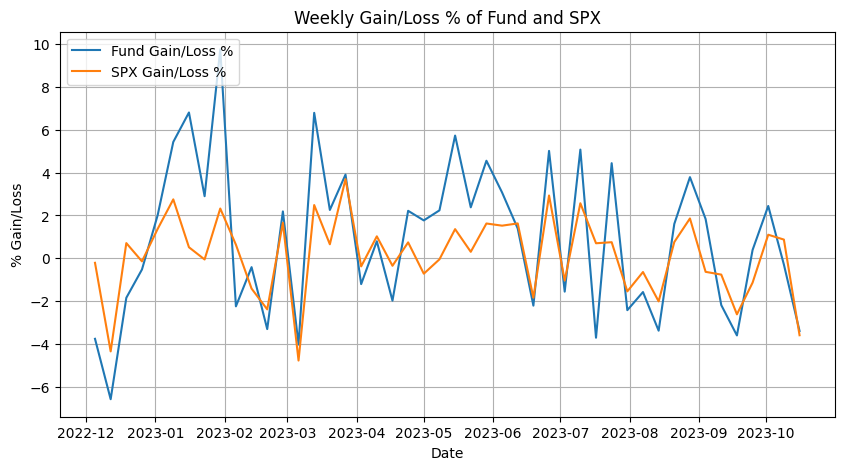

In [19]:
# Creating the line chart
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(w_fund_weekly_return.index, w_fund_weekly_return.values, label='Fund Gain/Loss %', color='tab:blue')
ax1.plot(w_spx_df.index, w_spx_df.values, label='SPX Gain/Loss %', color='tab:orange')

ax1.set_xlabel('Date')
ax1.set_ylabel('% Gain/Loss')
ax1.legend(loc='upper left')

plt.title('Weekly Gain/Loss % of Fund and SPX')
plt.grid(True)
plt.show()

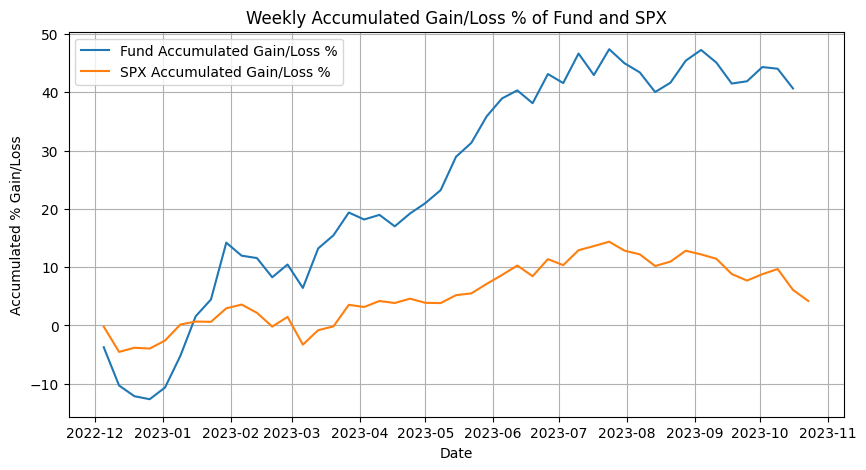

In [21]:
# Calculating the cumulative sum of the weekly returns for the fund and SPX
cumulative_fund_return = w_fund_weekly_return.cumsum()
cumulative_spx_return = spx_df_week.cumsum()

# Creating and plotting the line chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(cumulative_fund_return.index, cumulative_fund_return.values, label='Fund Accumulated Gain/Loss %', color='tab:blue')
ax.plot(cumulative_spx_return.index, cumulative_spx_return.values, label='SPX Accumulated Gain/Loss %', color='tab:orange')
ax.set_xlabel('Date')
ax.set_ylabel('Accumulated % Gain/Loss')
ax.legend(loc='upper left')
plt.title('Weekly Accumulated Gain/Loss % of Fund and SPX')
plt.grid(True)
plt.show()